# Basic Usage

First install the package via pip:

In [ ]:
!pip install "autora-synthetic-abstract-equation"

Then import the `sympy_experiment` function to your project

In [2]:
from autora.experiment_runner.synthetic.abstract.equation import equation_experiment

The package comes with sympy as dependency, so we can import functionality from sympy as well. Let's create a simple expression with two variables: `x**2 - y**2`

In [8]:
# First, import sympy
from sympy import symbols

# Declare our variables
x, y = symbols("x y")

# Declare the expression
expr = x ** 2 - y ** 2

We can use the expression to create an autora experiment:

In [9]:
experiment = equation_experiment(expr)

Let's try some values for the experiment. We can use numpy arrays or Pandas Dataframes as inputs. Pandas Dataframes have the advantage that we can name the columns according to the variable declaration to not confuse the order. If we use numpy arrays, the order is interpreted alphabetically

In [10]:
# First, import numpy
import numpy as np

# Declare a test input:
test_input = np.array([[1, 1], [2 ,2], [2 ,3]])

# Run the experiment with this input:
experiment.experiment_runner(test_input)

/usr/local/lib/python3.10/dist-packages/autora/experiment_runner/synthetic/abstract/sympy_equation/__init__.py:148: RuntimeWarning: Unnamed data is used. Arguments will be sorted alphabetically. Consider using a Pandas DataFrame with named columns for better clarity and ease of use.
  warnings.warn(


,x,y,observations
0,1.000305,0.998960,0.002688
1,2.000750,2.000941,-0.000761
2,1.998049,2.998698,-4.999989


Note, that there is some noise added to the input and that using numpy arrays will result in a warning. Let's rewrite the expression to showcase, why there is a warning and also turn off the noise

In [11]:
# Rearange the expression
expr = y ** 2 - x ** 2

# Reinitialize the experiment without noise
experiment = equation_experiment(expr, added_noise=0)

# Run the experiment with the same input:
experiment.experiment_runner(test_input)

/usr/local/lib/python3.10/dist-packages/autora/experiment_runner/synthetic/abstract/sympy_equation/__init__.py:148: RuntimeWarning: Unnamed data is used. Arguments will be sorted alphabetically. Consider using a Pandas DataFrame with named columns for better clarity and ease of use.
  warnings.warn(


,x,y,observations
0,1.0,1.0,0.0
1,2.0,2.0,0.0
2,2.0,3.0,5.0


Allthough we reordered the expression, the input arguments still are interpreted in alphabetical order.
To be save, we can also use Pandas Dataframe instead of arrays:

In [13]:
# Import pandas
import pandas as pd

test_input_pandas = pd.DataFrame({'x': [1, 2, 2], 'y': [1, 2, 3]})

experiment.experiment_runner(test_input_pandas)

,x,y,observations
0,1.0,1.0,0.0
1,2.0,2.0,0.0
2,2.0,3.0,5.0


To use addidational functionality, we can also add a domain for the independent variables to our experiment. To do this, we need to describe the indpendet variables:

In [15]:
# Import from autora
from autora.variable import IV

# Describe the variables
variable_x = IV(name="x", allowed_values=np.linspace(-10, 10, 100), value_range=(-10, 10))
variable_y = IV(name="y", allowed_values=np.linspace(-10, 10, 100), value_range=(-10, 10))

# Reinitialize the experiment:
experiment = equation_experiment(expr, [variable_x, variable_y])

Now we can plot the ground truth

/usr/local/lib/python3.10/dist-packages/autora/experiment_runner/synthetic/abstract/sympy_equation/__init__.py:148: RuntimeWarning: Unnamed data is used. Arguments will be sorted alphabetically. Consider using a Pandas DataFrame with named columns for better clarity and ease of use.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

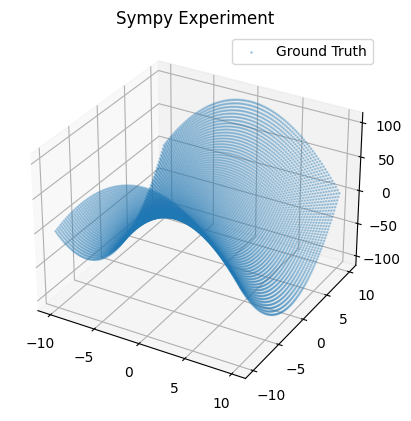

In [16]:
experiment.plotter()